<a href="https://colab.research.google.com/github/Manikanta5815/Company_Project/blob/master/Eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         1   2
0    3.600  79
1    1.800  54
2    3.333  74
3    2.283  62
4    4.533  85
..     ...  ..
267  4.117  81
268  2.150  46
269  4.417  90
270  1.817  46
271  4.467  74

[272 rows x 2 columns]
[3.6, 1.8, 3.333, 2.283, 4.533, 2.883, 4.7, 3.6, 1.95, 4.35, 1.8330000000000002, 3.917, 4.2, 1.75, 4.7, 2.167, 1.75, 4.8, 1.6, 4.25, 1.8, 1.75, 3.45, 3.0669999999999997, 4.533, 3.6, 1.9669999999999999, 4.083, 3.85, 4.433, 4.3, 4.467, 3.367, 4.033, 3.833, 2.017, 1.867, 4.833, 1.8330000000000002, 4.783, 4.35, 1.883, 4.567, 1.75, 4.533, 3.3169999999999997, 3.833, 2.1, 4.633, 2.0, 4.8, 4.716, 1.8330000000000002, 4.833, 1.733, 4.883, 3.717, 1.6669999999999998, 4.567, 4.317, 2.233, 4.5, 1.75, 4.8, 1.817, 4.4, 4.167, 4.7, 2.0669999999999997, 4.7, 4.033, 1.9669999999999999, 4.5, 4.0, 1.983, 5.067, 2.017, 4.567, 3.883, 3.6, 4.133, 4.333, 4.1, 2.633, 4.067, 4.933, 3.95, 4.5169999999999995, 2.167, 4.0, 2.2, 4.333, 1.867, 4.817, 1.8330000000000002, 4.3, 4.667, 3.75, 1.867, 4.9, 2.483, 4.367, 2.1, 

Text(0, 0.5, 'X2')

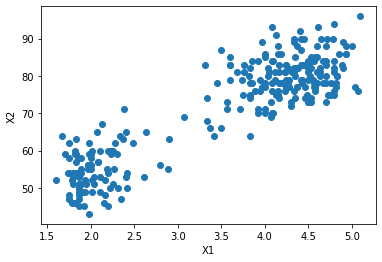

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from pandas import DataFrame
import statistics
import scipy.stats

from sklearn.model_selection import train_test_split
df=pd.read_csv("eda.txt", sep=" ", header=None)
df1=df.drop(columns=[0])
print(df1)
data1=df[1].to_list()
print(data1)
data2=df[2].to_list()
print(data2)
plt.scatter(data1,data2)
plt.xlabel("X1")
plt.ylabel("X2")



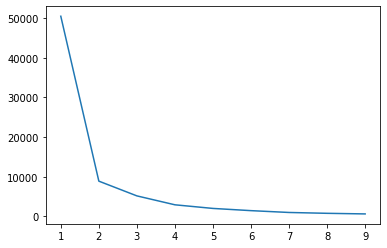

In [17]:

sse = {}
import math
from sklearn.cluster import KMeans
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100000).fit(df1)
    sse[k] = (kmeans.inertia_)

plt.plot(*zip(*sorted(sse.items())))

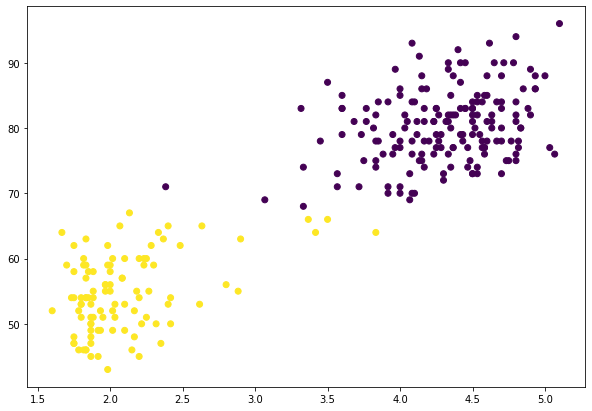

In [18]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df1)
plt.figure(figsize=(10, 7))  
plt.scatter(df1[1], df[2], c=cluster.labels_) 

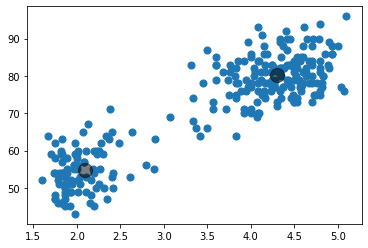

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df1)

plt.scatter(df1[1], df1[2], s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

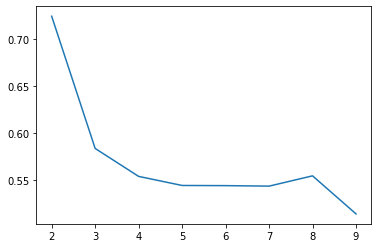

In [29]:
from sklearn.metrics import silhouette_score

sil = {}

for k in range(2, 10):
  kmeans = KMeans(n_clusters = k).fit(df1)
  labels = kmeans.labels_
  sil[k]=(silhouette_score(df1, labels, metric = 'euclidean'))
plt.plot(*zip(*sorted(sil.items())))